UNAD 

JHESIL ALINARES CARRILLO ADAME 

1. ANALISI EXPLORATORIO

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Secretaria Gobierno/Desktop/UNAD/Mall_Customers.csv')
print(df.head())
print(df.info())
print(df.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

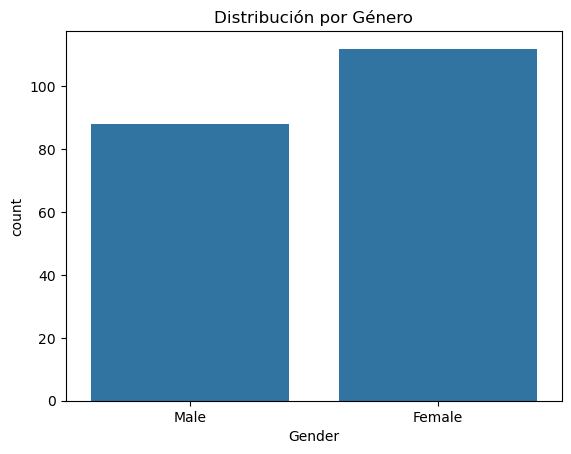

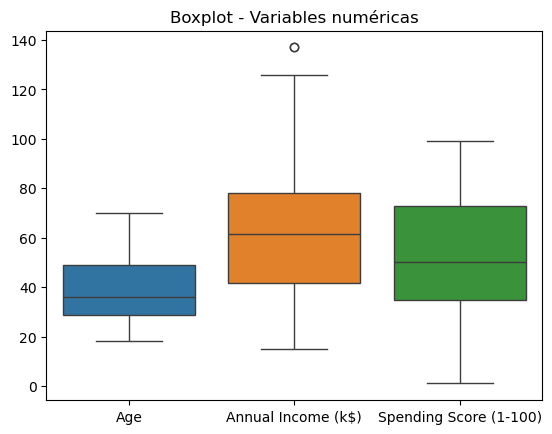

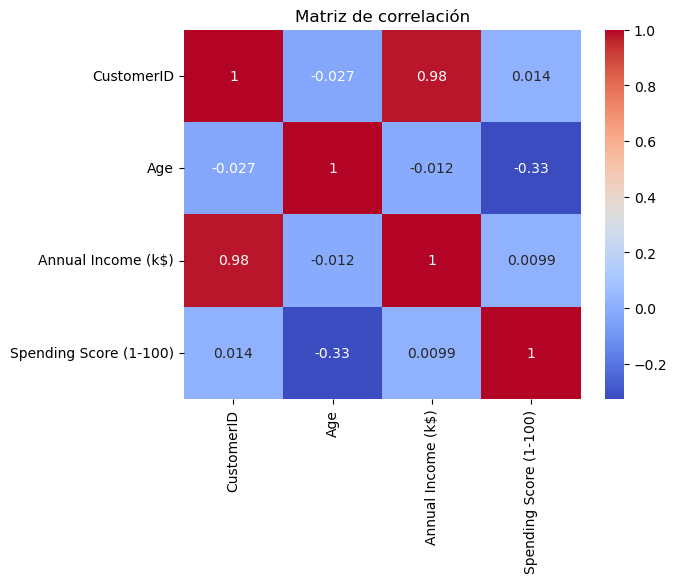

In [13]:
# Distribución por género
sns.countplot(data=df, x='Gender')
plt.title('Distribución por Género')
plt.show()

# Boxplots para detectar outliers
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot - Variables numéricas')
plt.show()

# Mapa de calor de correlaciones
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


2. Procesar los datos limpiándolos, tratando valores faltates y transformándolos según sea necesario. 

In [16]:
#Convertimos variables categóricas y escalamos
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codificar 'Gender'
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Female: 0, Male: 1

# Escalar datos
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


3. Seleccionar las características más revelantes para entrenar el modelo utilizando selección de características.
Caracteristicas de inetres para el agrupamiento:
Age, Annual Income (k$), Spending Score (1-100).

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

# Como no hay etiquetas, este paso puede usarse solo para exploración. O elegir por correlación visual.
# Aquí seleccionamos 3 más representativas
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[selected_features]
X_scaled = scaler.fit_transform(X)


4. Enrtenar el modelo configurando los diferentes hiperparámetros. 

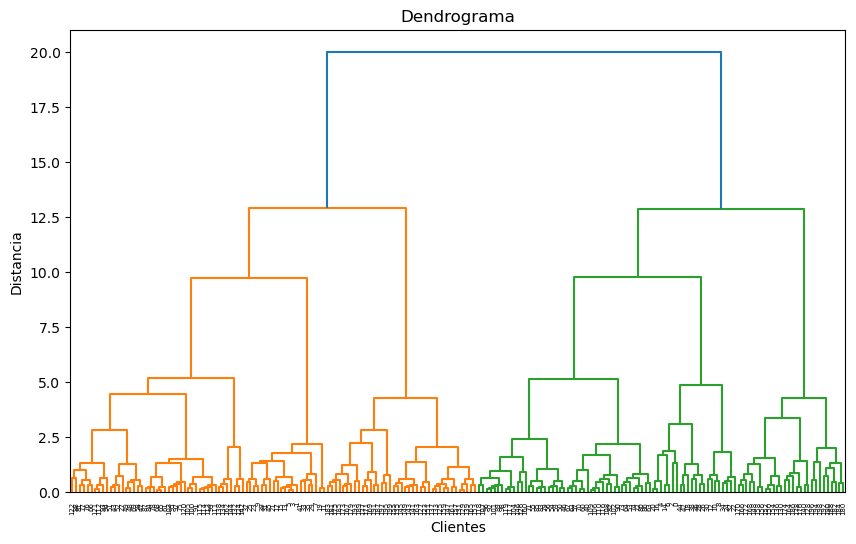

In [23]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram

linked = linkage(X_scaled, method='ward')

# Dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

# Elegimos 5 clusters (visualmente)
clusters = fcluster(linked, 5, criterion='maxclust')
df['Cluster'] = clusters


5. Evaluar el desempeño del modelo con métricas como coeficiente de Silhouette, índice de Calinski-Harabasz. 

In [26]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette = silhouette_score(X_scaled, df['Cluster'])
calinski = calinski_harabasz_score(X_scaled, df['Cluster'])

print(f"Coeficiente de Silhouette: {silhouette:.3f}")
print(f"Índice de Calinski-Harabasz: {calinski:.2f}")


Coeficiente de Silhouette: 0.390
Índice de Calinski-Harabasz: 107.83


6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 

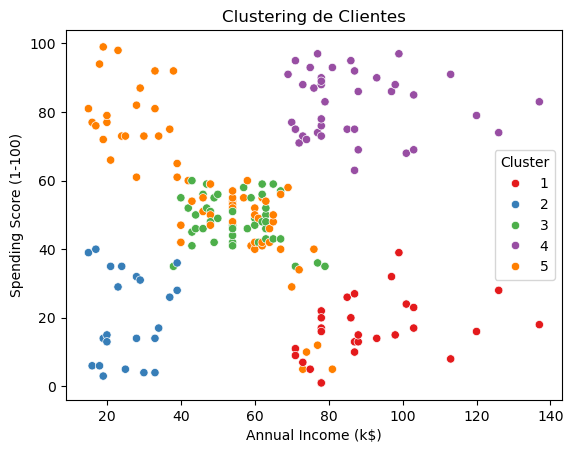

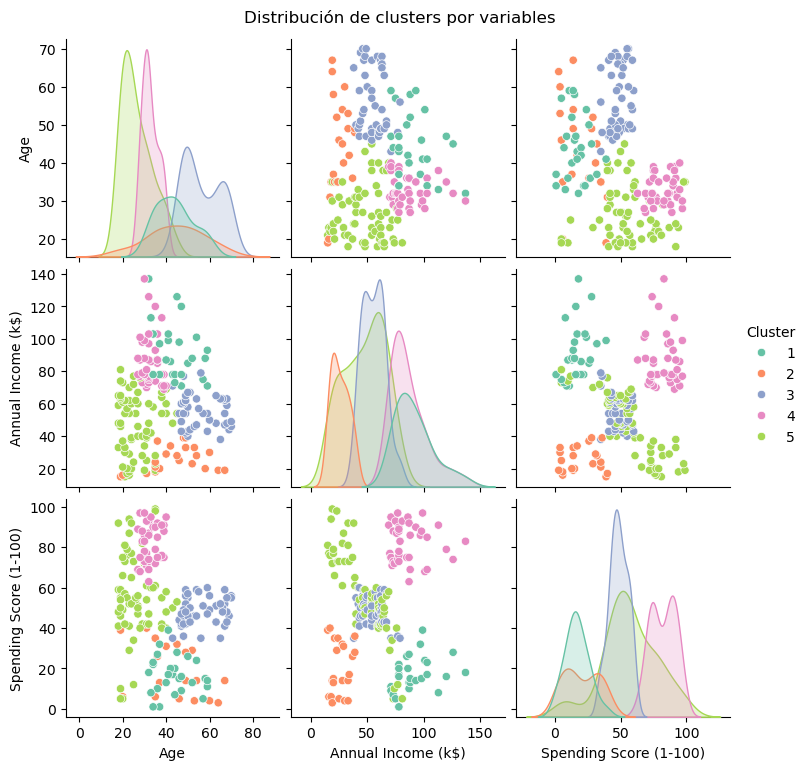

In [31]:
# Visualización 2D (por ingreso y puntaje de gasto)
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Set1')
plt.title('Clustering de Clientes')
plt.show()

# Otra visualización
sns.pairplot(df, vars=selected_features, hue='Cluster', palette='Set2')
plt.suptitle("Distribución de clusters por variables", y=1.02)
plt.show()


7. Interpretación y analisis 

In [34]:
# Análisis estadístico por cluster
cluster_summary = df.groupby('Cluster')[selected_features].mean().round(2)
print(cluster_summary)


           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
1        43.89               91.29                   16.68
2        44.32               25.77                   20.27
3        56.40               55.29                   48.36
4        32.69               86.54                   82.13
5        26.56               47.36                   56.79


In [ ]:
Analisis: 